In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from scipy.spatial import Voronoi, voronoi_plot_2d
import highlight_text

In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [3]:
barca_x=[18, 93,96,99,102,104,95,86,79,89]
barca_y=[40,9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((10,),dtype=int)) #takımları ayırabilmek için zeros ve ones listleri

opp_x=[115,99,100,102,104,104,102,97,98,94,77]
opp_y=[40,14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((11,),dtype=int))

df = pd.DataFrame({
    'x':barca_x+opp_x,
    'y':barca_y+opp_y,
    'team':barca+opp
})

In [4]:

'''fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', pitch_length=105, pitch_width=68, orientation='horizontal', 
              pitch_color='#38383b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='full',axis=True,label=True,tick=True)

pitch.draw(ax=ax)

pitch.scatter(0,0,ax=ax, color='red')
pitch.scatter(0,80,ax=ax, color='blue')
pitch.scatter(120,0,ax=ax, color='yellow')
pitch.scatter(105,68,ax=ax, color='green')'''

"fig, ax = plt.subplots(figsize=(13,8.5))\nfig.set_facecolor('#38383b')\nax.patch.set_facecolor('#38383b')\n\n#The statsbomb pitch from mplsoccer\npitch = Pitch(pitch_type='statsbomb', pitch_length=105, pitch_width=68, orientation='horizontal', \n              pitch_color='#38383b', line_color='#c7d5cc', figsize=(13, 8),\n              constrained_layout=False, tight_layout=True, view='full',axis=True,label=True,tick=True)\n\npitch.draw(ax=ax)\n\npitch.scatter(0,0,ax=ax, color='red')\npitch.scatter(0,80,ax=ax, color='blue')\npitch.scatter(120,0,ax=ax, color='yellow')\npitch.scatter(105,68,ax=ax, color='green')"

In [5]:
df

,x,y,team
0,18,40,0
1,93,9,0
2,96,22,0
3,99,33,0
4,102,44,0
5,104,56,0
6,95,63,0
7,86,52,0
8,79,33,0
9,89,22,0


In [6]:
points=np.column_stack((df.x,df.y)) #mplsoccer için points array x ve y valueları combine eder ve voronoi'a pass edilecek hale getirir

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


[[Text(0.38500000000000006, 0.9026797385620915, 'Team 1'),
  Text(0.4788835470085471, 0.9026797385620915, ' vs. '),
  Text(0.5274946581196582, 0.9026797385620915, 'Team 2')]]

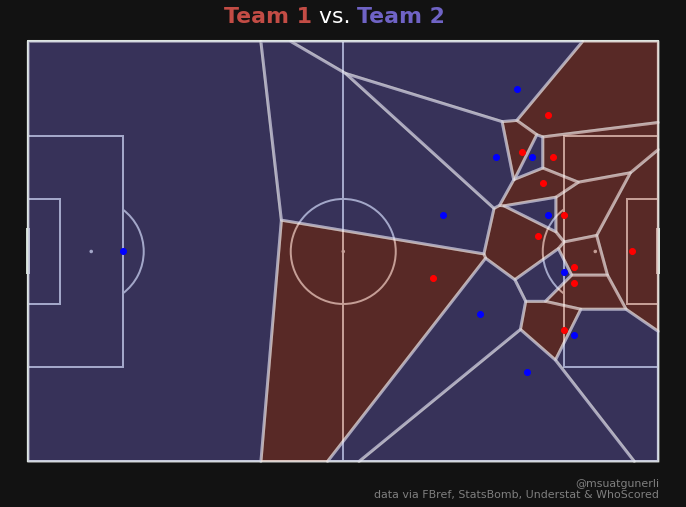

In [34]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#121212')
ax.patch.set_facecolor('#121212')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#121212', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='full')

pitch.draw(ax=ax)

x=df.x
y=df.y
team1,team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1, ax=ax, fc='#c34c45', ec='white', lw=3, alpha=0.4)
t2 = pitch.polygon(team2, ax=ax, fc='#6f63c5', ec='white', lw=3, alpha=0.4)

# Plot players
for i in range(len(df['x'])):
    if df['team'][i]==0:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='blue')
    if df['team'][i]==1:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='red')
        
#plt.title('Messi Goal vs Real Betis',fontfamily='Andale Mono',c='white',fontsize=24,ha='center',va='center')

fig.text(x=.85,y=.1,s='@msuatgunerli'+ '\n' + "data via FBref, StatsBomb, Understat & WhoScored",fontsize=11,fontfamily='Andale Mono',color='#7F7F7F', ha = 'right')

s='<Team 1> vs. <Team 2>'
highlight_text.fig_text(s=s,x=.385, y=.87, 
                        fontfamily='Andale Mono', highlight_weights=['bold'], fontsize=22, color='white', 
                        highlight_colors=['#c34c45','#6f63c5'])


#plt.savefig('voronoi.png',dpi=500,bbox_inches = 'tight',facecolor='#38383b')

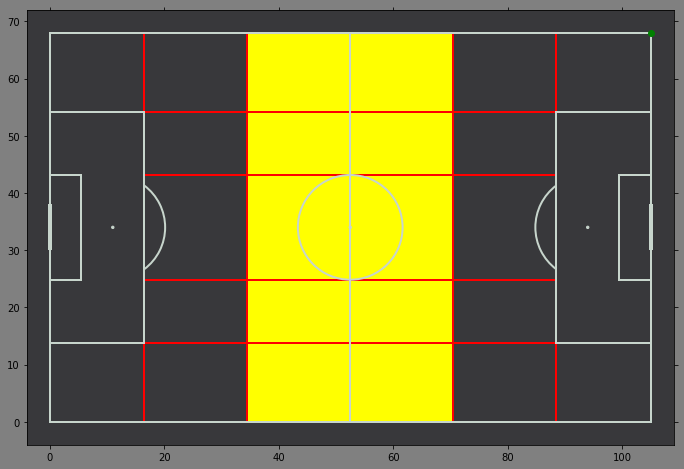

In [8]:
'''fig, ax = plt.subplots(figsize=(12,8))
fig.set_facecolor('#121212')
ax.patch.set_facecolor('#121212')

pitch = Pitch(pitch_type='uefa', pitch_length=105, pitch_width=68, orientation='horizontal',
        axis=True, label=True, positional=True, shade_middle=True, positional_color='red', figsize=(10.5, 6.8),
        pitch_color='#38383b', shade_color = 'yellow', line_color='#c7d5cc', constrained_layout=False, tight_layout=True, view='full',tick=True)

pitch.draw(ax=ax)

pitch.scatter(105,68,ax=ax, color='green')